[*********************100%***********************]  1 of 1 completed


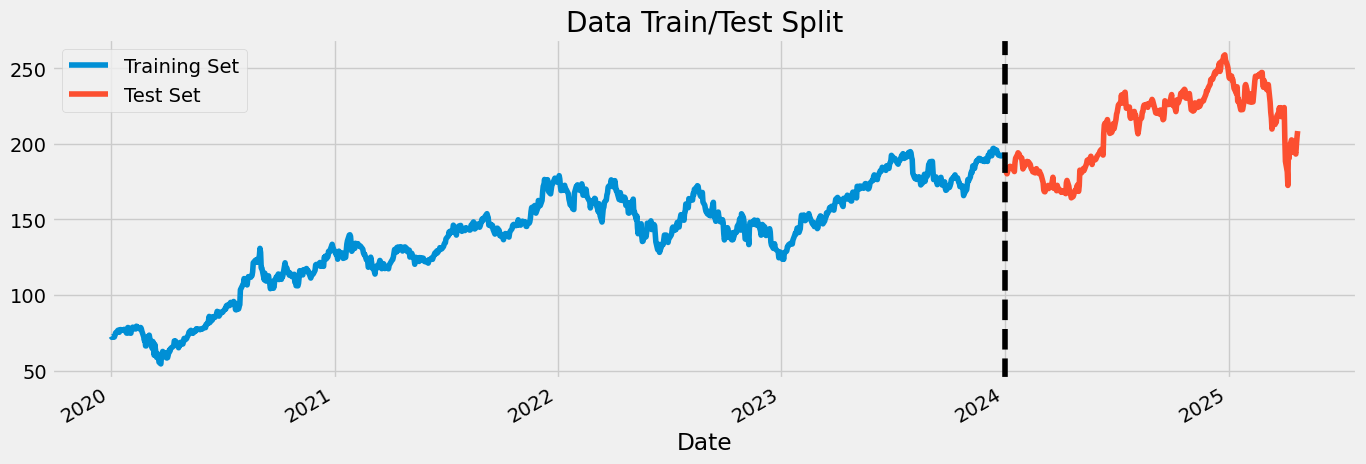

C:\Users\Owner\AppData\Local\Temp\ipykernel_23020\2375981397.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['dayofweek'] = df_.index.dayofweek
C:\Users\Owner\AppData\Local\Temp\ipykernel_23020\2375981397.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['quarter'] = df_.index.quarter
C:\Users\Owner\AppData\Local\Temp\ipykernel_23020\2375981397.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

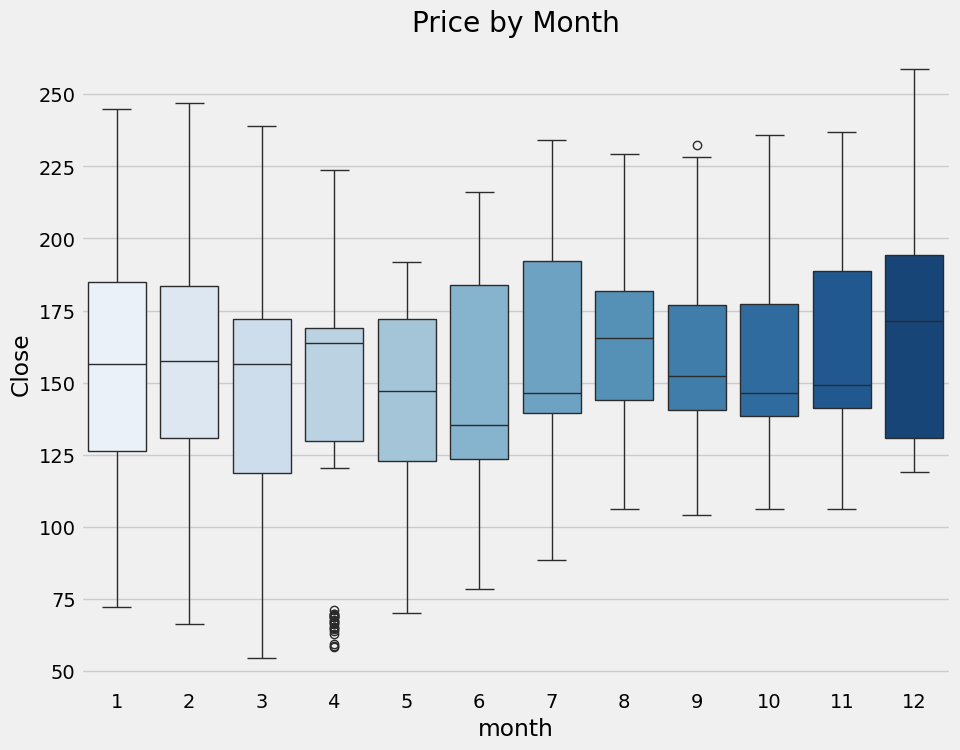

[0]	validation_0-rmse:140.65909	validation_1-rmse:210.06459
[100]	validation_0-rmse:52.75639	validation_1-rmse:107.41293
[200]	validation_0-rmse:21.28507	validation_1-rmse:70.30026
[300]	validation_0-rmse:10.91687	validation_1-rmse:56.67958
[400]	validation_0-rmse:7.67033	validation_1-rmse:51.14032


C:\Users\Owner\AppData\Local\Temp\ipykernel_23020\2375981397.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['dayofweek'] = df_.index.dayofweek
C:\Users\Owner\AppData\Local\Temp\ipykernel_23020\2375981397.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['quarter'] = df_.index.quarter
C:\Users\Owner\AppData\Local\Temp\ipykernel_23020\2375981397.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

[500]	validation_0-rmse:6.56582	validation_1-rmse:49.47795
[600]	validation_0-rmse:5.93190	validation_1-rmse:49.11116
[638]	validation_0-rmse:5.73120	validation_1-rmse:49.29572


C:\Users\Owner\AppData\Local\Temp\ipykernel_23020\2375981397.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


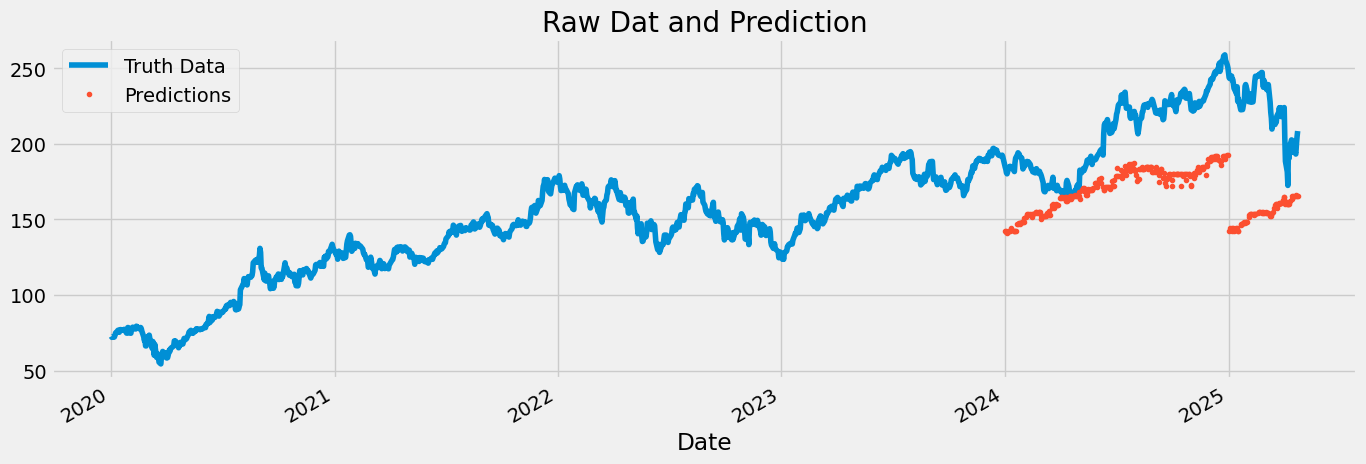

RMSE Score on Test set: 49.08


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error

import yfinance as yf
df_init = yf.download(['AAPL'], start='2020-01-01')
df_init.columns = df_init.columns.droplevel(level=1)
df_init.columns
df = df_init[['Close']]

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
train = df.loc[df.index < '01-01-2024']
test = df.loc[df.index >= '01-01-2024']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2024', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()
def create_features(df_):
    """
    Create time series features based on time series index.
    """
    df_['dayofweek'] = df_.index.dayofweek
    df_['quarter'] = df_.index.quarter
    df_['month'] = df_.index.month
    df_['year'] = df_.index.year
    df_['dayofyear'] = df_.index.dayofyear
    df_['dayofmonth'] = df_.index.day
    df_['weekofyear'] = df_.index.isocalendar().week
    df_['Volume'] = df_init['Volume']
    return df_
df = create_features(df)
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='Close', palette='Blues')
ax.set_title('Price by Month')
plt.show()
train = create_features(train)
test = create_features(test)

features = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear', 'Volume']
target = 'Close'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Close']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()
score = np.sqrt(mean_squared_error(test['Close'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')


In [52]:
import yfinance as yf
import pandas as pd

# Download AAPL history and drop extra MultiIndex level
df_init = yf.download(['AAPL'], start='2020-01-01', progress=False)
df_init.columns = df_init.columns.droplevel(level=1)

# Keep only Close for downstream features
df_prices = df_init[['Close']].copy()


In [53]:
def create_features(df):
    df['dayofweek']  = df.index.dayofweek
    df['quarter']    = df.index.quarter
    df['month']      = df.index.month
    df['year']       = df.index.year
    df['dayofyear']  = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    df['Volume']     = df_init['Volume']
    return df

def add_lags(df):
    mapping = df['Close'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('1 days')).map(mapping)
    df['lag2'] = (df.index - pd.Timedelta('2 days')).map(mapping)
    df['lag3'] = (df.index - pd.Timedelta('3 days')).map(mapping)
    return df

# Apply and drop initial NaNs
df_feat = create_features(df_prices.copy())
df_feat = add_lags(df_feat)
df_feat.dropna(inplace=True)


In [54]:
ticker     = yf.Ticker("AAPL")
news_items = ticker.news  # returns list of dict

titles, dates = [], []
for item in news_items:
    title = item.get('title', '')
    ts    = item.get('providerPublishTime')  # official field
    if ts is None:
        continue
    dt = pd.to_datetime(ts, unit='s')
    titles.append(title)
    dates.append(dt.date())


In [55]:

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Hyperparameters
num_words = 10000  # vocabulary size
maxlen    = 80     # sequence length

# Load pre-tokenized IMDB data
(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=num_words)

# Pad to fixed length and enforce int32 dtype
x_train = pad_sequences(x_train, maxlen=maxlen, dtype='int32')
x_val   = pad_sequences(x_val,   maxlen=maxlen, dtype='int32')

# Build model (no input_length argument)
sent_model = Sequential([
    Embedding(input_dim=num_words, output_dim=128),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# Compile with correct optimizer & loss order
sent_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
sent_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=5,
    batch_size=128,
    verbose=2
)



Epoch 1/5
196/196 - 16s - 81ms/step - accuracy: 0.7791 - loss: 0.4536 - val_accuracy: 0.8392 - val_loss: 0.3623
Epoch 2/5
196/196 - 13s - 68ms/step - accuracy: 0.8828 - loss: 0.2834 - val_accuracy: 0.8382 - val_loss: 0.3639
Epoch 3/5
196/196 - 13s - 68ms/step - accuracy: 0.9176 - loss: 0.2123 - val_accuracy: 0.8325 - val_loss: 0.4025
Epoch 4/5
196/196 - 13s - 68ms/step - accuracy: 0.9434 - loss: 0.1511 - val_accuracy: 0.8282 - val_loss: 0.4739
Epoch 5/5
196/196 - 13s - 68ms/step - accuracy: 0.9590 - loss: 0.1123 - val_accuracy: 0.8203 - val_loss: 0.5403


In [56]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer   = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(titles)
sequences   = tokenizer.texts_to_sequences(titles)
padded_news = pad_sequences(sequences, maxlen=maxlen, dtype='int32')

if padded_news.shape[0] > 0:
    
    scores = sent_model.predict(padded_news, batch_size=32, verbose=0).flatten()
    
    df_sent = pd.DataFrame({
        'date':      dates,
        'sentiment': scores
    })
    daily_sent = (
        df_sent
        .groupby('date')['sentiment']
        .mean()
        .rename('daily_sentiment')
    )
else:
    
    trading_dates = df_feat.index.date    
    daily_sent = pd.Series(
        0.0,
        index=pd.Index(trading_dates, name='date'),
        name='daily_sentiment'
    )



In [57]:

daily_sent.index = pd.to_datetime(daily_sent.index)

df = df_feat.merge(
    daily_sent,
    left_index=True,
    right_index=True,
    how='left'
)

df['daily_sentiment'].fillna(method='ffill', inplace=True)



C:\Users\Owner\AppData\Local\Temp\ipykernel_23020\2896453074.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['daily_sentiment'].fillna(method='ffill', inplace=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_23020\2896453074.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['daily_sentiment'].fillna(method='ffill', inplace=True)


In [58]:

import pandas_datareader.data as pdr

start, end = df.index.min(), df.index.max()


macro = pdr.DataReader(
    ['UNRATE',         
     'LNS11300060',    
     'CPIAUCSL',      
     'DGS1',          
     'DGS10'],         
    'fred', 
    start, 
    end
)


macro = macro.reindex(df.index).ffill()

# Merge into your main df by index
df = df.merge(
    macro, 
    left_index=True, 
    right_index=True, 
    how='left'
)


df[['UNRATE','LNS11300060','CPIAUCSL','DGS1','DGS10']] = (
    df[['UNRATE','LNS11300060','CPIAUCSL','DGS1','DGS10']]
    .fillna(method='ffill')
    .fillna(method='bfill')
)


C:\Users\Owner\AppData\Local\Temp\ipykernel_23020\2037893725.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill')
C:\Users\Owner\AppData\Local\Temp\ipykernel_23020\2037893725.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='bfill')


In [59]:

FEATURE_COLS = [
    'dayofweek','quarter','month','year',
    'dayofyear','dayofmonth','weekofyear',
    'Volume','lag1','lag2','lag3',
    'daily_sentiment',
    'UNRATE','LNS11300060','CPIAUCSL','DGS1','DGS10'
]
SPLIT_DATE = '2024-01-01'

train_mask = df.index < SPLIT_DATE

X_train = df.loc[train_mask, FEATURE_COLS]
y_train = df.loc[train_mask, 'Close']
X_test  = df.loc[~train_mask, FEATURE_COLS]
y_test  = df.loc[~train_mask, 'Close']

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    early_stopping_rounds=50,
    max_depth=3,
    learning_rate=0.01
)
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=100
)

y_pred = model.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE with news feature: {rmse:.4f}")

df.loc[~train_mask, 'prediction'] = y_pred


[0]	validation_0-rmse:33.07470	validation_1-rmse:74.53663
[100]	validation_0-rmse:12.97384	validation_1-rmse:46.89157
[200]	validation_0-rmse:5.53983	validation_1-rmse:36.32921
[300]	validation_0-rmse:3.04889	validation_1-rmse:31.77566
[400]	validation_0-rmse:2.30432	validation_1-rmse:30.51523
[500]	validation_0-rmse:2.03123	validation_1-rmse:29.91456
[600]	validation_0-rmse:1.88872	validation_1-rmse:29.38829
[700]	validation_0-rmse:1.80055	validation_1-rmse:29.20965
[800]	validation_0-rmse:1.73800	validation_1-rmse:29.10604
[843]	validation_0-rmse:1.71745	validation_1-rmse:29.12853
Test RMSE with news feature: 29.0991


Compared to the original model RMSE significantly reduced and the adding of news as a feature helped increased the performance of the model.

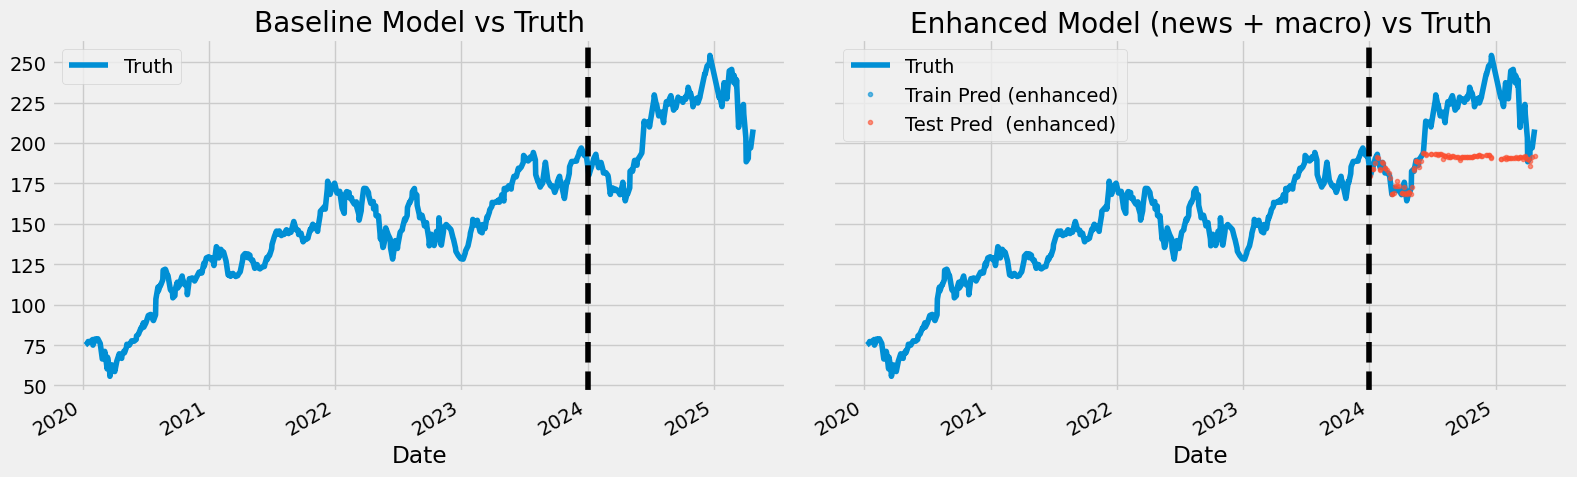

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# re-load your original baseline predictions if you saved them:
#   df['baseline_pred'] = baseline_model.predict(baseline_X_test)
# otherwise, skip plotting the baseline

# Set up styling to match your earlier plots
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Split train / test on the same date
split = '2024-01-01'
train = df.loc[df.index <  split]
test  = df.loc[df.index >= split]

# Create a figure with two panels
fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)

# -------------------------------------------------------------------
# Panel 1: Truth vs. Baseline
# -------------------------------------------------------------------
axes[0].set_title('Baseline Model vs Truth')
# plot the truth
df['Close'].plot(ax=axes[0], label='Truth', color=color_pal[0])
# plot baseline predictions (if you have them)
if 'baseline_pred' in df:
    train['baseline_pred'].plot(ax=axes[0], style='.', 
                                label='Train Pred (baseline)', alpha=0.6)
    test ['baseline_pred'].plot(ax=axes[0], style='.', 
                                label='Test Pred  (baseline)', alpha=0.6)
axes[0].axvline(split, color='black', ls='--')
axes[0].legend()

# -------------------------------------------------------------------
# Panel 2: Truth vs. Enhanced
# -------------------------------------------------------------------
axes[1].set_title('Enhanced Model (news + macro) vs Truth')
df['Close'].plot(ax=axes[1], label='Truth', color=color_pal[0])
train['prediction'].plot(ax=axes[1], style='.', 
                         label='Train Pred (enhanced)', alpha=0.6)
test ['prediction'].plot(ax=axes[1], style='.', 
                         label='Test Pred  (enhanced)', alpha=0.6)
axes[1].axvline(split, color='black', ls='--')
axes[1].legend()

plt.tight_layout()
plt.show()
